In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


mnist

In [4]:
mnist

<module 'keras.datasets.mnist' from '/usr/local/conda3/lib/python3.6/site-packages/keras/datasets/mnist.py'>

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [6]:
len(x_train)

60000

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train[1234]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 149,
        255, 129,  37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 149,
        253, 252, 215,  60,   7,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  53,
        150, 249, 252, 252,  38,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

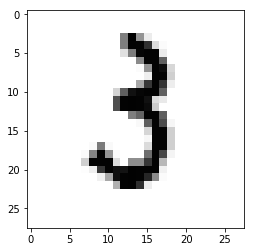

In [9]:
plt.imshow(x_train[1234],cmap='Greys')

In [10]:
y_train[1234]

3

In [11]:
y_train[5678]

5

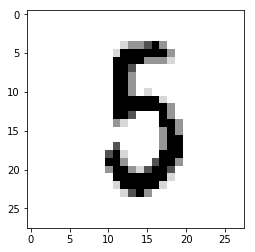

In [12]:
plt.imshow(x_train[5678],cmap='Greys')

In [13]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

## one hot encoding

In [14]:
from keras.utils import np_utils

In [15]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [16]:
#原本只有一個數字, one hot encoding後變成10位陣列
y_train[5678],y_train[1234]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32))

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

## 加入第一層隱藏層

In [18]:
model=Sequential()

In [19]:
model.add(Dense(500,input_dim=784))
model.add(Activation('sigmoid'))

## 加入第二層隱藏層

In [20]:
model.add(Dense(500))
model.add(Activation('sigmoid'))

In [21]:
#設定10個神經元給輸出
model.add(Dense(10))
#利用softmax當激發函數
model.add(Activation('softmax'))

## 組裝神經網路

In [25]:
#loss function mse
#optimizer為訓練模型方式
#檢查準確率 metrics增加評分標準
model.compile(loss='mse',optimizer=SGD(lr=0.1),metrics=['accuracy'])

## 檢視神經網路

In [32]:
model.summary()
#392500=784*500+500 偏差值
#250500=500*500+500
#5010=500*10+10
print(784*500+500)
print(500*500+500)
print(500*10+10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________
3925

392500
250500
5010
